In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import cross_validate,train_test_split,KFold,LeaveOneOut,cross_val_score,cross_val_predict
from sklearn import metrics
from matplotlib import pyplot as plt

In [7]:
url1 = 'https://raw.githubusercontent.com/orangeczw/ML_team_Name/master/Task_0/data/train.csv?token=AIHC5CJFX4NSZHMGSR2NLAK6MKVSA'
url2 = 'https://raw.githubusercontent.com/orangeczw/ML_team_Name/master/Task_0/data/test.csv?token=AIHC5CJMR63KOCNBX6OMOTC6MKVVY'
train = pd.read_csv(url1, error_bad_lines=False)
test = pd.read_csv(url2, error_bad_lines=False)
# train.fillna(method ='ffill', inplace = True) 

Y = train.iloc[:,1].copy()
X = train.iloc[:,2:12].copy()
test_set = test.iloc[:,1:11].copy()


In [9]:
reg = LinearRegression().fit(X, Y)
print(reg.coef_, '\n', reg.score(X, Y), '\n', reg.intercept_)

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1] 
 1.0 
 -7.087523901105897e-10


In [10]:
# X = sm.add_constant(X)#add intercept
lm = sm.OLS(Y, X)
lm_1 = lm.fit()

print(lm_1.summary())

train_pred = lm_1.predict(X)#in-sample prediction
SSE = np.square(train_pred - Y).sum(axis = 0)#SSE of in-sample prediction

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.820e+22
Date:                Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:58:27   Log-Likelihood:             1.5236e+05
No. Observations:               10000   AIC:                        -3.047e+05
Df Residuals:                    9990   BIC:                        -3.046e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1000   5.86e-13   1.71e+11      0.0

In [11]:
test_pred = lm_1.predict(test_set) #prediction for test data
test_pred = test_pred.to_frame()
id = range(10000, 12000)
test_pred.insert(0, "Id", id, True)
test_pred.rename(columns={test_pred.columns[1]: "y"}, inplace = True)

In [12]:
test_pred.head(5)

,Id,y
0,10000,-66.002423
1,10001,451.406504
2,10002,-461.676417
3,10003,40.501209
4,10004,-126.744722


In [188]:
test_pred.to_csv(r'C:\Users\l\Desktop\task_0.csv', index = False)

#### 10-fold CV
Here we don't really have another model to compare with...

In [98]:
# kf = KFold(n_splits=10) # Define the split - into 2 folds 
# kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
# print(kf) 

KFold(n_splits=10, random_state=None, shuffle=False)


In [114]:
# for train_index, test_index in kf.split(X):
#     X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
#     Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
#     print(X_train, X_test, Y_train, Y_test)

# X_train.shape
# X_test.shape

(1000, 10)

Cross-validated scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


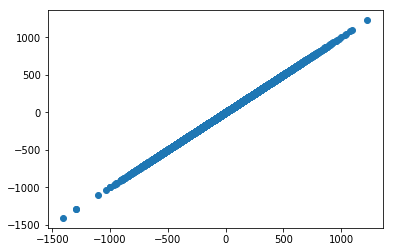

In [119]:
# Perform 6-fold cross validation
scores = cross_val_score(reg, X, Y, cv=10)
print('Cross-validated scores:', scores)
predictions = cross_val_predict(reg, X, Y, cv=10)
plt.scatter(Y, predictions)

#### LOOCV

In [113]:
# loo = LeaveOneOut()
# loo.get_n_splits(X)

# for train_index, test_index in loo.split(X):
#     X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
#     Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
#     print(X_train, X_test, Y_train, Y_test)
